# ClinVar ascertainment plots

In [42]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt

from src import constants as C
from src.visualisation import color_tools as ct
from src.visualisation import clinvar_plots

In [44]:
# Palettes and styles
plt.style.use(C.STYLE_DEFAULT)
PALETTE = [ct.color_palette("regions")[i + 1] for i, x in enumerate(C.NMD_REGIONS)]

In [45]:
# Read data
footprint = pd.read_csv(C.STATS_NMD_FOOTPRINT, sep="\t")
ascertainment = pd.read_csv(C.STATS_CLINVAR_ASCERTAINMENT, sep="\t")
vus = pd.read_csv(C.STATS_CLINVAR_VUS_REGION, sep="\t")

## CDS footprints of NMD regions

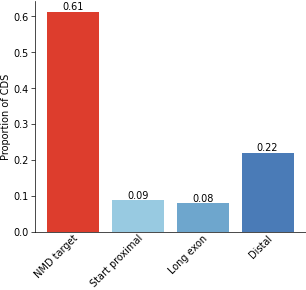

In [46]:
fig, ax = plt.subplots()

clinvar_plots.vertical_bars(
    footprint,
    ax,
    "footprint",
    "Proportion of CDS",
    color=PALETTE,
)

clinvar_plots.xticks(C.NMD_REGION_LABELS)

## Ascertainment in ClinVar

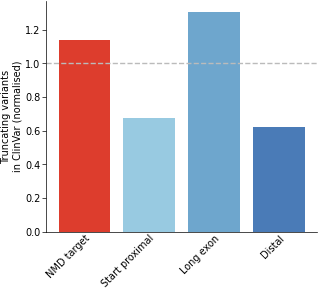

In [47]:
fig, ax = plt.subplots()
clinvar_plots.vertical_bars(
    ascertainment,
    ax,
    "prop_norm",
    "Truncating variants\nin ClinVar (normalised)",
    bar_label=False,
    color=PALETTE
)

ax.axhline(1, linestyle="--", color=ct.color_palette("default").grey)

clinvar_plots.xticks(C.NMD_REGION_LABELS)

## Proportion of truncating variants in ClinVar which are VUS

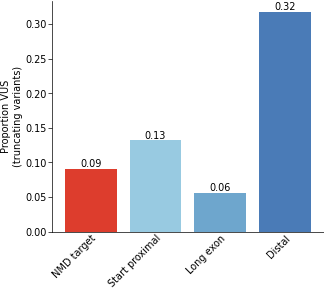

In [48]:
fig, ax = plt.subplots()
clinvar_plots.vertical_bars(
    vus, ax, "proportion", "Proportion VUS\n(truncating variants)", color=PALETTE
)

clinvar_plots.xticks(C.NMD_REGION_LABELS)